# Introduction to neural network classification with tensorflow

in this notebook we're going to learn how to write neural networks for classification problems

a classification is where you try to classify something as ont thing or another

A few types of classification problems:
* binary classification
* multiclass classification
* multilabel classification


## creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circules
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# check out features
X 

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


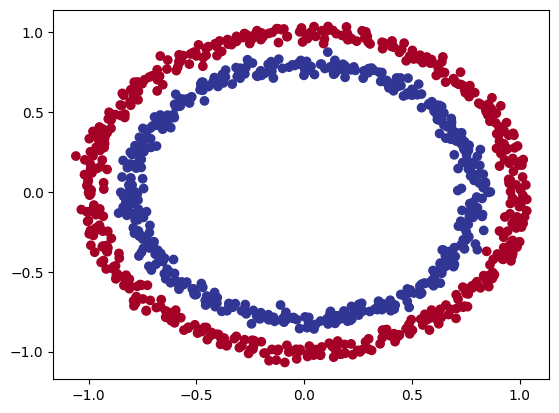

In [5]:
# visualizze with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## input and output shapes

In [6]:
# ceck the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# how many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [9]:
X[0].shape, y[0].shape

((2,), ())

## steps in modelling

In [10]:
X.dtype

dtype('float64')

## steps in modelling

the steps in modelling with tensorflow are typically:

1. create or import a model
2. compile the model
3. fit the model
4. evaluate themodel
5. tweak, evaluate and repeat

In [11]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# 1. create a model
circle_model = tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
circle_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

# 3. fit the model
circle_model.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 2s 3ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5030
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.5230
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.5630
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6080
Epoch 10/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6619 - accuracy: 0.5270
Epoch 11/

In [12]:
circle_model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 1.0000


[0.026051592081785202, 1.0]

bueno el flaco se puso a hacer unos modelos de mierda solo para mostrar asique los voy a ir haciendo aca

Since we're working on a binary classification problem and our model is getting around -50# accuracy... it's performing as if it's gessing. so let's step things up a notch and add an extra layer.

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 3.8629 - accuracy: 0.4760


[3.8629443645477295, 0.47600001096725464]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer
2. compilling a model - here we might want to choose a different opimization function such as Adam instead of sgd
3. fitting a model - perhaps we might fir our model for more epochs (leave it trainig for longer)

In [16]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neuros
    tf.keras.layers.Dense(10), # add another layer withg 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. evaluate the mode
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5040


[0.6958803534507751, 0.5040000081062317]

In [18]:
# plot predictions
predictions = model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


**Note:** whenever your model is performing strangely or there's something going on going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your mode, inspect your models'predictions.

To visualize our model's predictions, let's create a function `plot_decision_boundary()` 

* take in a trained model, features (X) and labels (y)
* create a meshgrid of the different X values
* make predictions across the meshgrid
* plt the predictions as well as a line between zones (where each unique class falls)

In [19]:
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [20]:
import numpy as np

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [21]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  plots the decision bounday creted by a model predicting on X.
  this function was inspired by 2 resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://madewithml.com/courses/foundations/neural-networks/
  """

  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


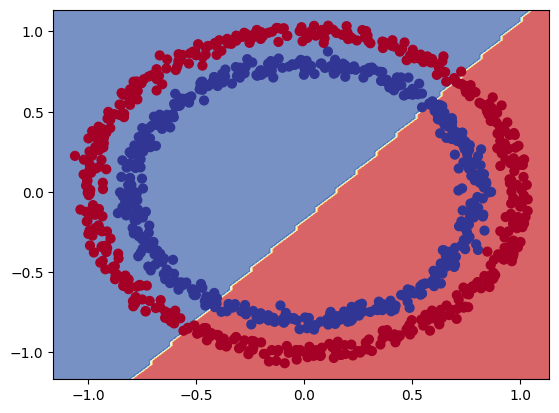

In [22]:
# check out the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [23]:
# let's see if our model canm be used for a regression problem...

tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# let's split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)
# da error, lo comento porque dsp queda el error hinchando las bolas

oh wwait... we compiled our model for a binary classification problem

but.. we're now working on a regression problem, let's change the model to suit our data

In [24]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model, this time with a regression-specific loss fucntion
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 460.7079 - mae: 460.7079
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 378.1584 - mae: 378.1584
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 298.8918 - mae: 298.8918
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 216.5775 - mae: 216.5775
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 130.2178 - mae: 130.2178
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 50.3523 - mae: 50.3523
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 68.5574 - mae: 68.5574
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 70.7486 - mae: 70.7486
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 51.6060 - mae: 51.6060
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9494 - mae: 45.9494
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 7ms/step


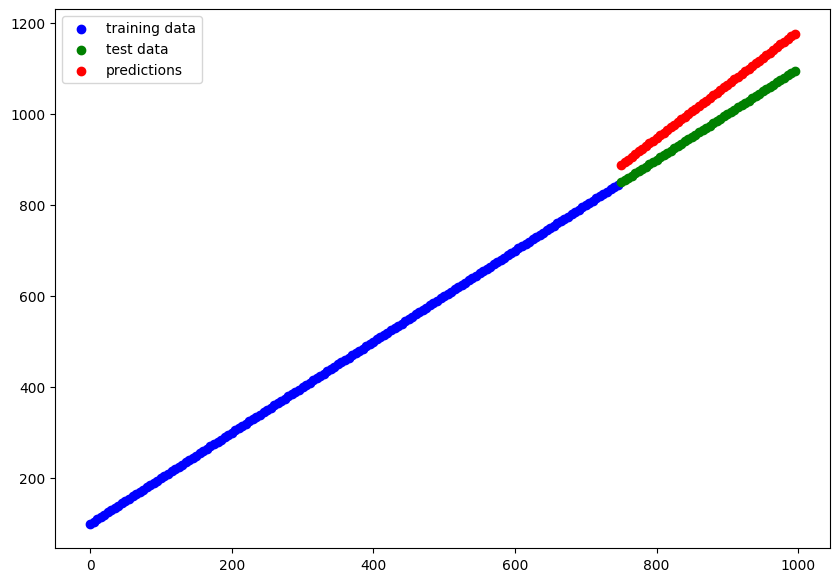

In [25]:
# make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label='predictions')
plt.legend()

## the missing piece: non-linearity



In [26]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear) # or "linear"
])

# 2. copmile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3178 - accuracy: 0.4510
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2678 - accuracy: 0.4620
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2545 - accuracy: 0.4630
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2537 - accuracy: 0.4650
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2533 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2527 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2522 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2516 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2511 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2250 - accuracy: 0.4690
Epoch 11/

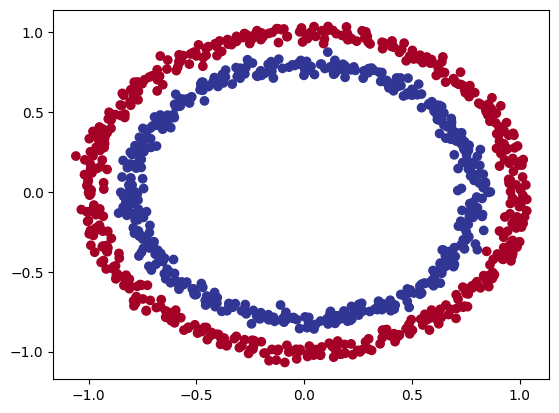

In [27]:
# check out our dat 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


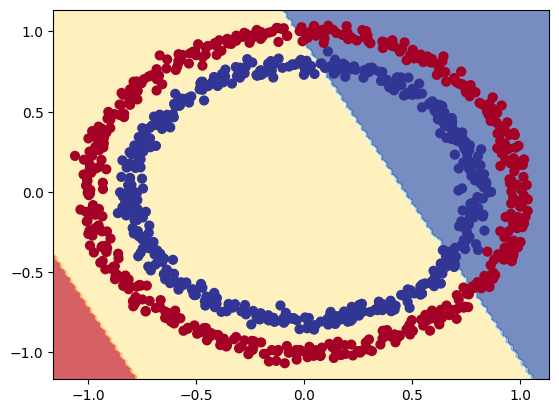

In [28]:
# check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

let's try build our first nerla noetwork with a non-linear activatcion function

In [29]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6486 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5805 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5516 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5448 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5101 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4711 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4395 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4380 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4290 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3985 - accuracy: 0.4810
Epoch 11/

In [30]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

# 2. compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.7029 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8434 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3670 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1646 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9104 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7772 - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6927 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6555 - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6303 - accuracy: 0.0000e+00
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss:

In [31]:
# time to replicate the multi-layer neural network from tensorflow playground

# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.3246 - accuracy: 0.4700
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1027 - accuracy: 0.4710
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0198 - accuracy: 0.4660
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9674 - accuracy: 0.4570
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9273 - accuracy: 0.4260
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8960 - accuracy: 0.3840
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.3430
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8517 - accuracy: 0.3340
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8343 - accuracy: 0.3430
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8195 - accuracy: 0.3460
Epoch 11/

In [32]:
# evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9570


[0.14139600098133087, 0.9570000171661377]

313/313 [==============================] - 1s 2ms/step
doing binary classification


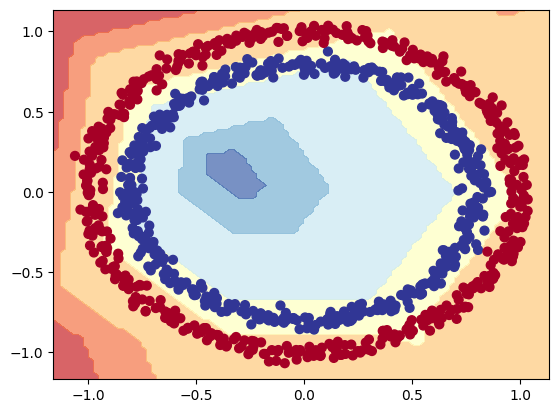

In [33]:
# how do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [34]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.4950
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5060
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5060
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5070
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5060
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5100
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5100
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5110
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5090
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5100
Epoch 11/

In [35]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.9900


[0.1387675404548645, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification


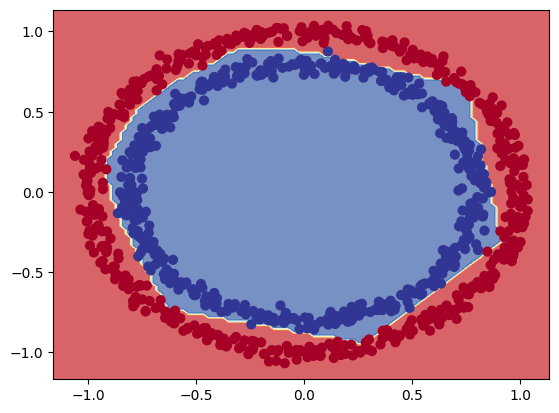

In [36]:
plot_decision_boundary(model_7, X, y)

**question:** what's wrong with the predictions we've made? are we really evaluating our model correctly? hint: what data did the model learn on and what data with we predict on?
hicimos la prediccion con los mismos datos con los que entrenamos jeje

**Note:** the cmobination of **linear (staright lines) and non linear (non-straight lines) functions** is one of the key fundamentals of neural networks

now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [37]:
# create a toy tensor (similiar to the data we pass into our models)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

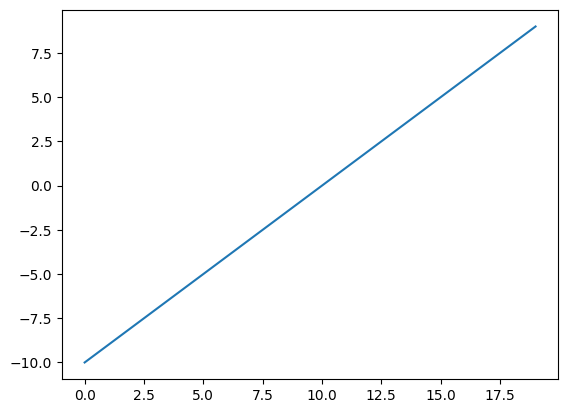

In [38]:
# visualize our toy tensor
plt.plot(A)

In [39]:
# let's start by replicating sigmoid sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

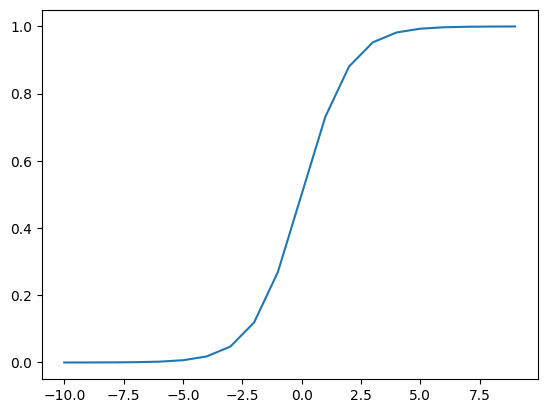

In [40]:
# plot our toy tensor transformed by sigmoid
plt.plot(A, sigmoid(A))

In [41]:
# let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# pas our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

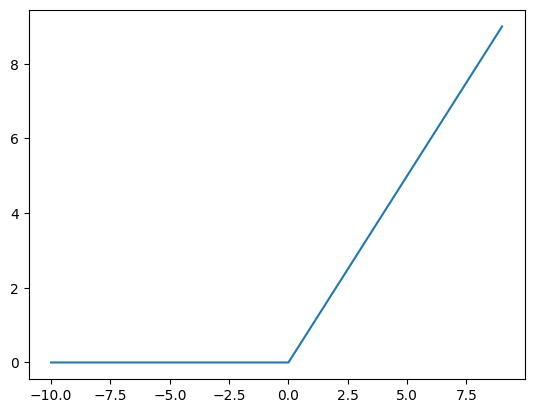

In [42]:
# plot relu-modified tensor
plt.plot(A, relu(A))

In [43]:
# let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

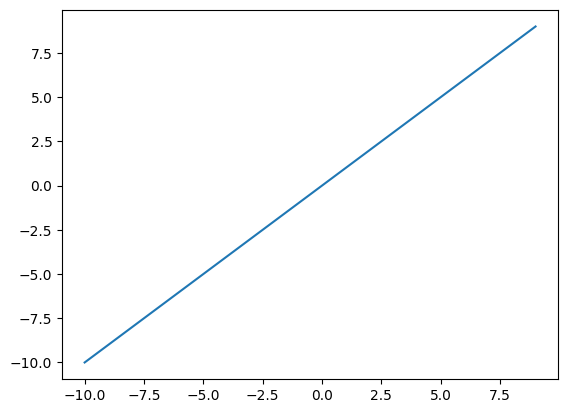

In [44]:
# does the linear activation function change anythin?
plt.plot(A, tf.keras.activations.linear(A))

In [45]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

so far we've been training and testing on the same dataset...

however, in machine learning this is basically a sin.

so let's create a training and test set.

In [46]:
# check how many examples we have
len(X)

1000

In [47]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [48]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [50]:
model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 12        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [51]:
# let's recreate a modl to fit on the training data and evaluate on the test data

# set random seed
tf.random.set_seed(42)

# 1. create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

# 2. compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7065 - accuracy: 0.4663
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4800
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5075
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5800
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5575
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5525
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5688
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.5700
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6575
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.7325
Epoch 11/25
25/25 [

In [52]:
# evaluate the mdoel on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 0.9850


[0.09850011765956879, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


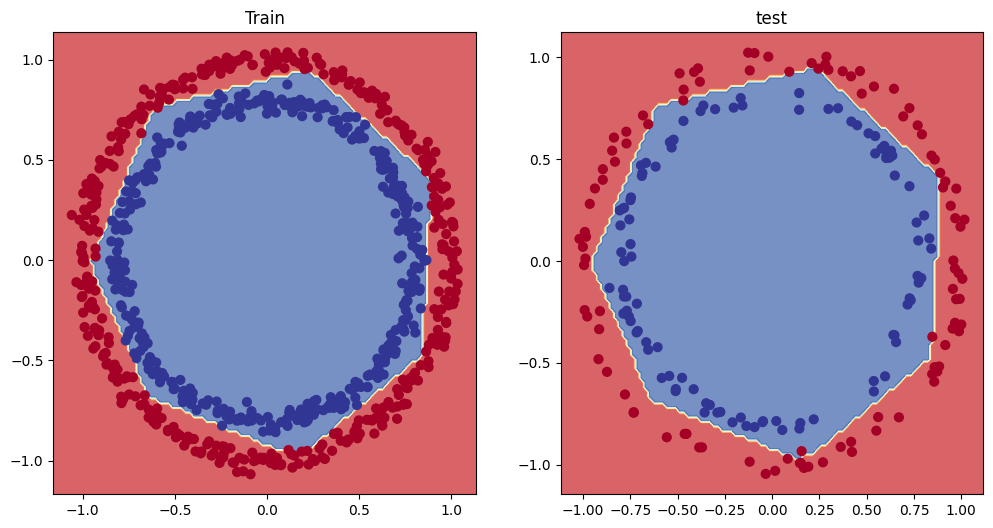

In [53]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8,
                       X=X_train,
                       y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_8,
                       X=X_test,
                       y=y_test)

## plot the loss (or training) curves

In [54]:
history.history

{'loss': [0.7065037488937378,
  0.6942958831787109,
  0.6892412304878235,
  0.6847315430641174,
  0.6803134679794312,
  0.6747588515281677,
  0.6686660051345825,
  0.6614218354225159,
  0.6398587226867676,
  0.6005133986473083,
  0.562560498714447,
  0.5154894590377808,
  0.45561450719833374,
  0.3912375271320343,
  0.32662659883499146,
  0.2710096836090088,
  0.22532348334789276,
  0.1945650726556778,
  0.172536239027977,
  0.15266312658786774,
  0.13461336493492126,
  0.11784209311008453,
  0.10725337266921997,
  0.10136312246322632,
  0.09462200850248337],
 'accuracy': [0.4662500023841858,
  0.47999998927116394,
  0.5074999928474426,
  0.5799999833106995,
  0.5575000047683716,
  0.5525000095367432,
  0.5687500238418579,
  0.5699999928474426,
  0.6575000286102295,
  0.7325000166893005,
  0.8062499761581421,
  0.8612499833106995,
  0.8787500262260437,
  0.9362499713897705,
  0.9674999713897705,
  0.9775000214576721,
  0.981249988079071,
  0.9900000095367432,
  0.981249988079071,
  0.9

In [55]:
# let's convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.706504,0.46625
1,0.694296,0.48000
2,0.689241,0.50750
3,0.684732,0.58000
4,0.680313,0.55750
5,0.674759,0.55250
6,0.668666,0.56875
7,0.661422,0.57000
8,0.639859,0.65750
9,0.600513,0.73250


Text(0.5, 1.0, 'model_8 loss curves')

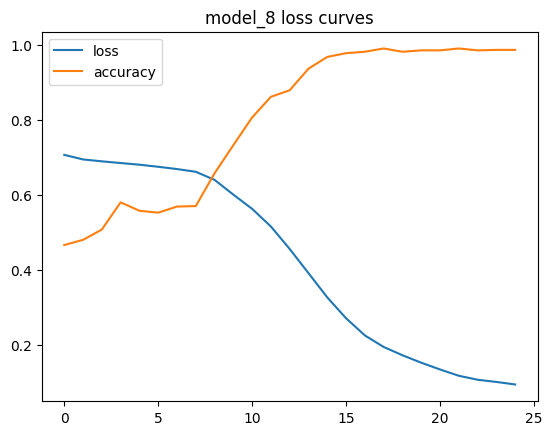

In [56]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

**Note:** for many problems the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels)

## finding the best learning rate

to find the ideal learning rate (the learning rate where the loss decreasses the most during training) we're going to use the following steps:
* a learning rate **callback** - you can think of a callback as an extra piece of functionallity, you can add to your model *while* it's training
* another model (we could use the same one as above, but we're practicing building models here)
* a modified loss curve plot

In [57]:
# set random seed
tf.random.set_seed(42)

# 1. create the model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7166 - accuracy: 0.4850 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.4825 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.4812 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.4825 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.4800 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.4800 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.4750 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.4737 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epocs'>

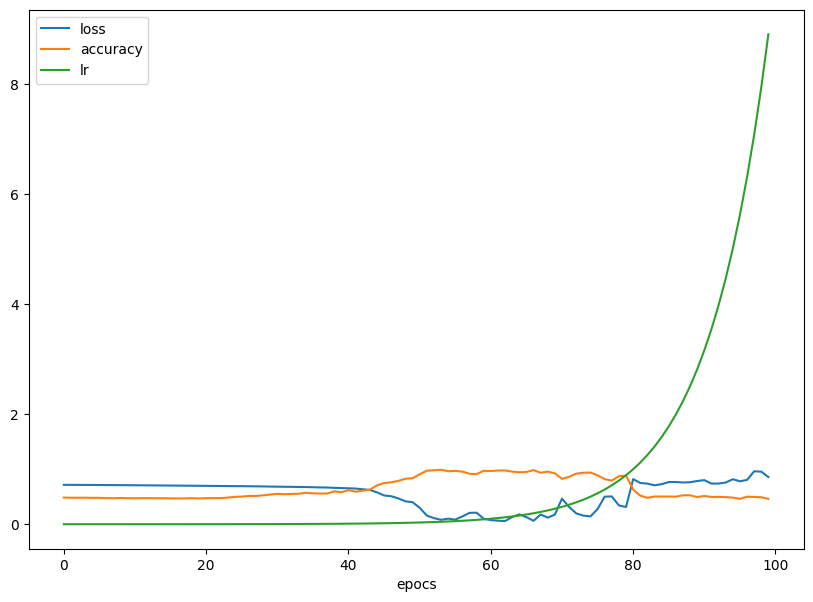

In [58]:
# checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epocs")

Text(0.5, 1.0, 'learning rate vs loss')

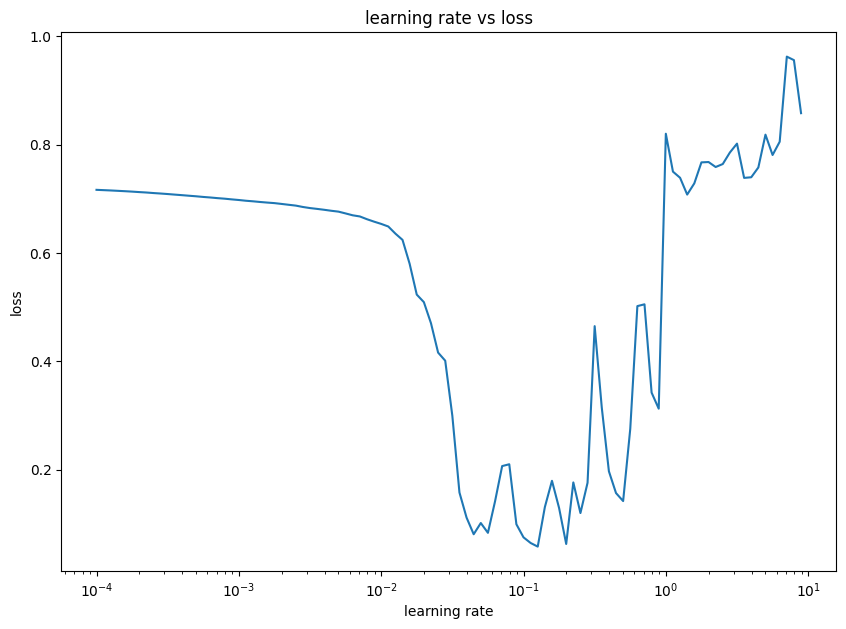

In [59]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [60]:
len(lrs)

100

In [61]:
# example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [62]:
# let's try using a higher *ideal* learning rate with the same model as before

# set random seed
tf.random.set_seed(42)

# 1. create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"])

# 3. fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6810 - accuracy: 0.6438
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5813
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6250
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.7225
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.7200
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7950
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7962
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8800
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.9050
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.9300
Epoch 11/20
25/25 [

In [63]:
# evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1232 - accuracy: 0.9450


[0.12323682010173798, 0.9449999928474426]

In [64]:
# evaluate model 8 on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.9850


[0.09850011765956879, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


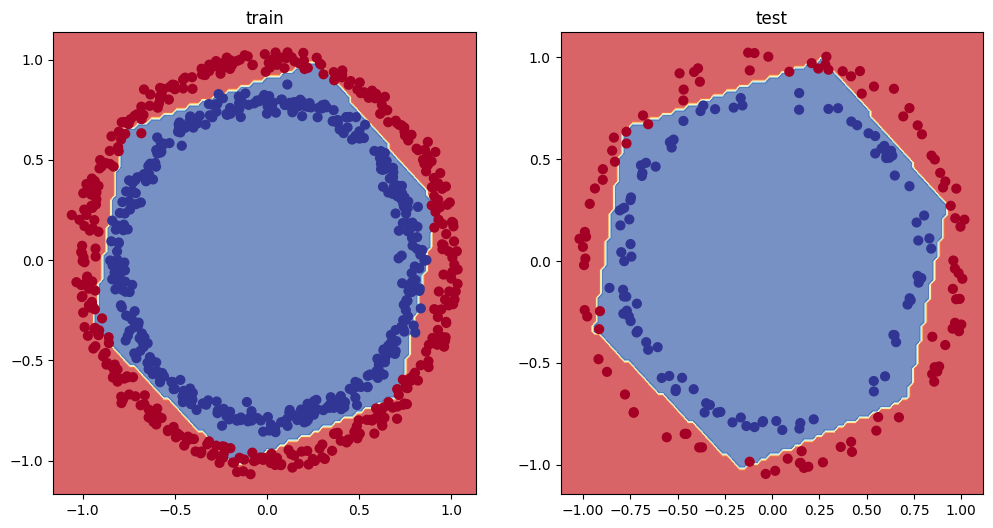

In [65]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

## more classificatrion evaluation methods

alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* accuracy
* precision - less false positives
* recall - less false negatives
* f1-score - combination of precision and recall
* confusion matrix
* classification report (from sklearn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [66]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9450
model loss on the test set: 0.12323682010173798
model accuracy on the test set: 94.50%


how about a confusion matrix?

In [67]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(X_test)
# confusion_matrix = confusion_matrix(y_test, y_preds)
# confusion_matrix

# ValueError: Classification metrics can't handle a mix of binary and continuous targets

7/7 [==============================] - 0s 3ms/step


In [68]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [69]:
y_preds[:10]

array([[0.9216731 ],
       [0.9582288 ],
       [0.9582288 ],
       [0.9582288 ],
       [0.23423122],
       [0.01835292],
       [0.9582288 ],
       [0.00615504],
       [0.9582288 ],
       [0.04972143]], dtype=float32)

oops... looks like our predictions array has come out it **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions

In [70]:
y_preds[:10].round()

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [71]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [72]:
# creawte a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[90, 11],
       [ 0, 99]])

how about we pretify our confusion matrix?

**Note:** the confusion matrix code we're about to write is a remix of sklearn's plot confusion matrix

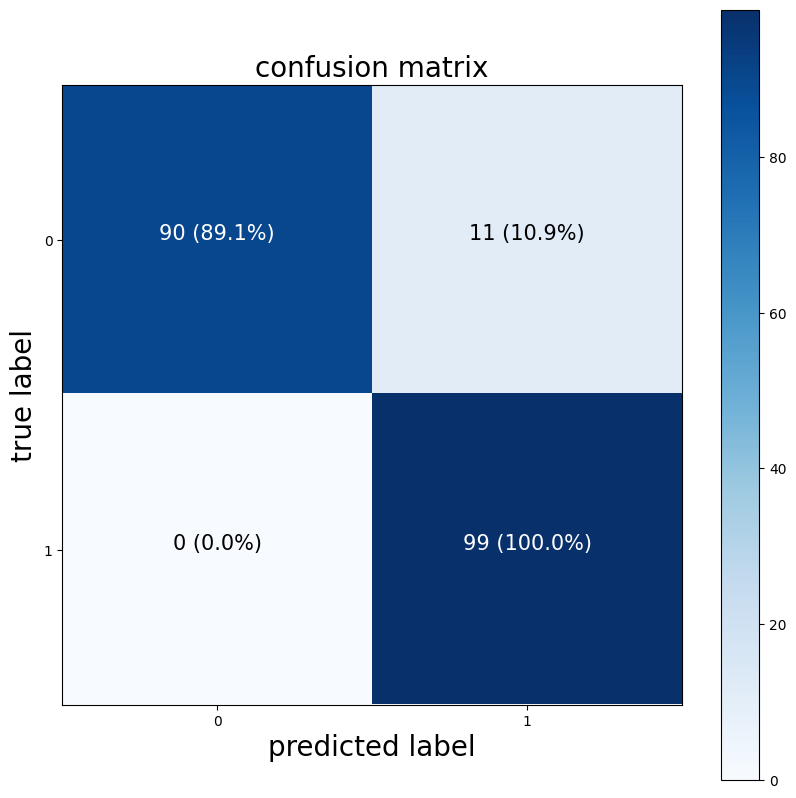

In [73]:
import itertools

figsize = (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# let's pretify it
fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="confusion matrix",
       xlabel="predicted label",
       ylabel="true label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set treshols for differente colors
threshold = (cm.max() + cm.min()) / 2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [74]:
cm_norm

array([[0.89108911, 0.10891089],
       [0.        , 1.        ]])

In [75]:
cm.shape[0]

2

In [31]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # let's pretify it
  fig, ax = plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="confusion matrix",
        xlabel="predicted label",
        ylabel="true label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set treshols for differente colors
  threshold = (cm.max() + cm.min()) / 2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

# working with a larger example (multiclass classification)

when you have more thaan two classes as an option, it's known as **multi-class classification**.
* this means if you have 3 different classes, it's multi-class classification
* it also means if you have 100 different classes, it's multi-class classification

to practice multi-class classification, we're going to build a neral network to classify images of different items of clothing.




In [77]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorten into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [78]:
# show the firest training example
print(f"training sample:\n{train_data[0]}\n")
print(f"traiing label:\n{train_labels[0]}\n")

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [79]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

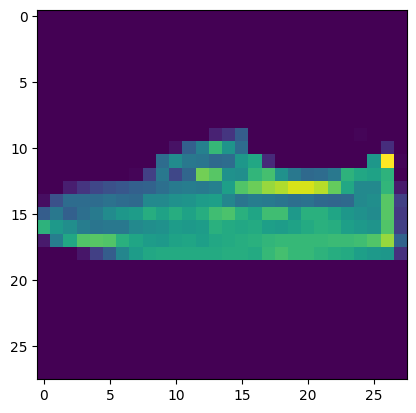

In [80]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[40000])

In [81]:
# check out samples label
train_labels[40000]

7

In [33]:
# create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

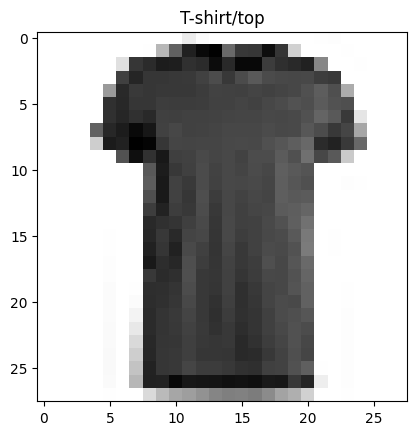

In [83]:
# plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

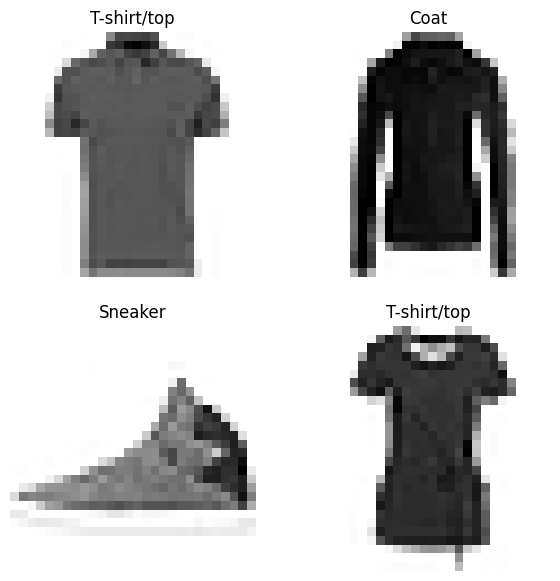

In [84]:
# plot multiple random images of fashien MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## building a multi-class classification model

for our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* input shape = 28, 28 (the shape of one image)
* output shape = 10 (one per class of clothing)
* loss function = tf.keras.losses.CategoricalCrossentropy()
  * if your labels are one-hot encoded, use categoricalcrossentropy()
  * if your labels are integer form use sparsecategoricalcrossentropy()
* output layer activation = softmax (not sigmoid)

In [85]:
train_data[0].shape

(28, 28)

In [86]:
len(class_names)

10

In [87]:
# our data needs to be flattened (from 28 * 28 to None, 284)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [88]:
28 * 28

784

In [89]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

3 common errors with shapes
* input shape (first layer)
* output shape (last layer)
* loss functions (sparse or not sparse) (not sparse expects one hot encoded)

In [90]:
# set random seed
tf.random.set_seed(42)

# create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3802 - accuracy: 0.1357 - val_loss: 2.0807 - val_accuracy: 0.2031
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9748 - accuracy: 0.2119 - val_loss: 1.7360 - val_accuracy: 0.2896
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6937 - accuracy: 0.2778 - val_loss: 1.6553 - val_accuracy: 0.2831
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6478 - accuracy: 0.2776 - val_loss: 1.6294 - val_accuracy: 0.2779
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6255 - accuracy: 0.2787 - val_loss: 1.6070 - val_accuracy: 0.2840
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6116 - accuracy: 0.2838 - val_loss: 1.5952 - val_accuracy: 0.3012
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5999 - accuracy: 0.2937 - val_loss: 1.5869 - val_accuracy:

In [91]:
# check the model summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [92]:
# check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in thetensors they try to find patterns between 0 & 1.

In [93]:
# we can get our training and testing data between 0 & 1 by dividing by the maximum

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [94]:
# now our data is normalized, let's build a model to find patterns in it

# set random seed
tf.random.set_seed(42)

# create the model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile the model
model_12.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
norm_history = model_12.fit(train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3555 - accuracy: 0.4610 - val_loss: 1.0405 - val_accuracy: 0.5770
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9460 - accuracy: 0.6191 - val_loss: 0.9071 - val_accuracy: 0.6322
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8536 - accuracy: 0.6585 - val_loss: 0.8591 - val_accuracy: 0.6688
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8158 - accuracy: 0.6813 - val_loss: 0.8296 - val_accuracy: 0.6886
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7925 - accuracy: 0.6908 - val_loss: 0.8158 - val_accuracy: 0.6874
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7734 - accuracy: 0.7011 - val_loss: 0.8133 - val_accuracy: 0.6882
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7591 - accuracy: 0.7082 - val_loss: 0.7928 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)

<Axes: title={'center': 'normalized data'}, xlabel='epochs'>

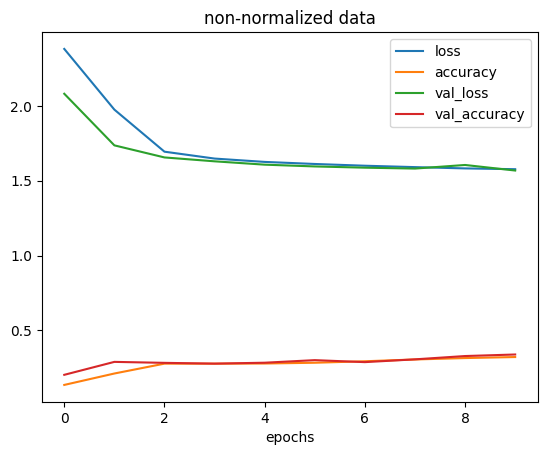

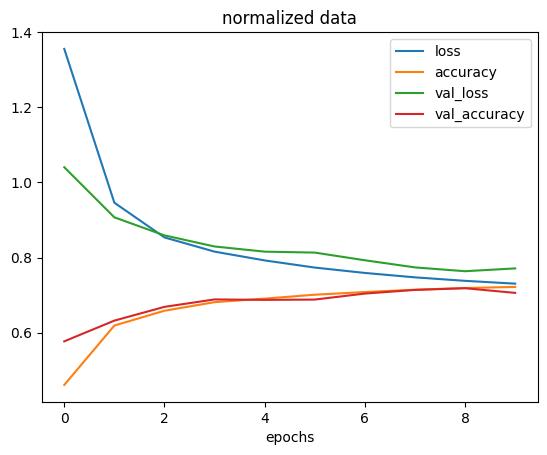

In [95]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="non-normalized data", xlabel="epochs")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="normalized data", xlabel="epochs")

**Note:** the same model with even *slightly* different datacan produce *dramatically* different results. so when you're comparing models, it's important to make sure yo're comparing them on the samne criteria (e.g same architecture but different data or same data but different architecture)

## finding the ideal learning rate

In [96]:
# set random seed
tf.random.set_seed(42)

# create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1683 - accuracy: 0.5673 - val_loss: 0.8351 - val_accuracy: 0.6973 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7360 - accuracy: 0.7452 - val_loss: 0.7098 - val_accuracy: 0.7491 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6629 - accuracy: 0.7714 - val_loss: 0.6720 - val_accuracy: 0.7620 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6394 - accuracy: 0.7784 - val_loss: 0.6563 - val_accuracy: 0.7756 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6262 - accuracy: 0.7833 - val_loss: 0.6528 - val_accuracy: 0.7697 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6167 - accuracy: 0.7848 - val_loss: 0.6368 - val_accuracy: 0.7782 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'finding the ideal learning rate')

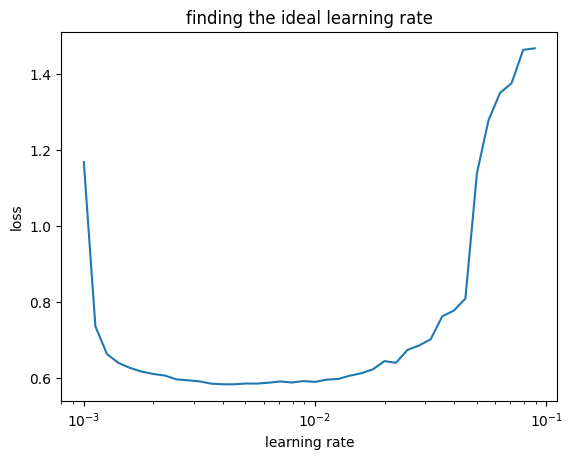

In [97]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate")

In [98]:
# so let's refit a model with the ideal learning rate

# set random seed
tf.random.set_seed(42)

# create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_14.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3509 - accuracy: 0.4649 - val_loss: 0.8978 - val_accuracy: 0.6593
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8290 - accuracy: 0.6897 - val_loss: 0.8060 - val_accuracy: 0.6956
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7591 - accuracy: 0.7208 - val_loss: 0.7597 - val_accuracy: 0.7189
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7282 - accuracy: 0.7358 - val_loss: 0.7374 - val_accuracy: 0.7241
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7100 - accuracy: 0.7423 - val_loss: 0.7241 - val_accuracy: 0.7374
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6899 - accuracy: 0.7524 - val_loss: 0.7081 - val_accuracy: 0.7511
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6744 - accuracy: 0.7605 - val_loss: 0.6925 - val_accuracy:

## evaluating our multi-class classification model

to evaluate our multi-class classification model we could:
* evaluate its performance using other classification metrics (such as a confusion matrix)
* assess some of its predictions (through visualizations)
* improve its results (by training it for longer or changing the architecture)
* save and export it for use in an application

let's go through the top 2...

In [99]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [100]:
# make some predictions with our model
y_probs = model_14.predict(test_data) # probs is short for "prediction probability"

# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        4.2184896e-35, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00, 6.3320412e-38, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [101]:
test_data[:10], test_data_norm[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

**Note:** remember to make predictions on the same kind of data yor model was trained on (e.g if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [102]:
# make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probability"

313/313 [==============================] - 0s 1ms/step


In [103]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.8875662e-10, 8.8654703e-14, 8.4487937e-08, 1.2422870e-14,
        1.6101876e-12, 1.8043107e-01, 9.5174324e-10, 1.4211798e-01,
        1.3506126e-04, 6.7731577e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [104]:
# convert all of the predictions probabilites into integers
y_preds = y_probs.argmax(axis=1)

# view the first 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [105]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [106]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_preds)

0.8003

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[719,   2,  13, 112,   2,   6, 125,   0,  21,   0],
       [  2, 942,  10,  36,   3,   3,   2,   0,   2,   0],
       [ 13,   5, 671,  15, 161,   0, 107,   0,  28,   0],
       [ 53,  10,  21, 826,  25,  15,  47,   0,   3,   0],
       [  3,   3, 124,  32, 727,   0, 107,   0,   4,   0],
       [  0,   0,   2,   1,   0, 889,   0,  53,  10,  45],
       [181,   2, 122,  69, 114,   8, 479,   0,  25,   0],
       [  0,   0,   0,   0,   0,  39,   0, 920,   0,  41],
       [ 29,   1,  15,   7,   1,   9,  23,   8, 906,   1],
       [  0,   0,   0,   0,   0,  24,   0,  51,   1, 924]])

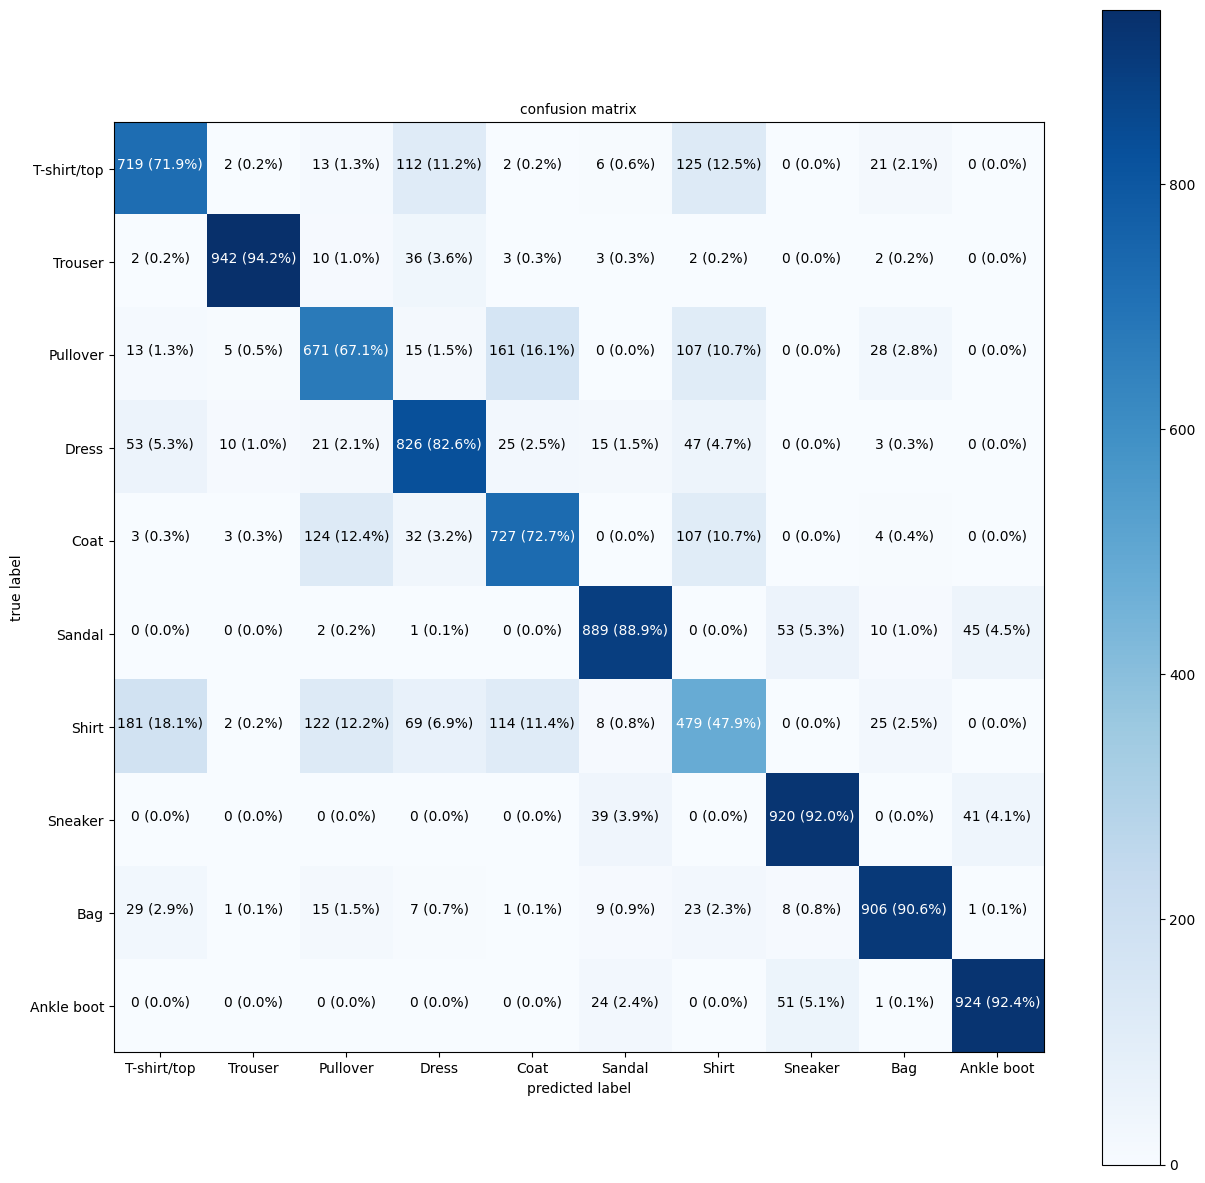

In [108]:
# make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note:** often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

how about we create a fun little function for:
* plot a random image
* make a predictions on a said image
* label the plot with the truth label & the predicted label

In [194]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image, plots it and labels it with a prediction and truth label.
  """
  # set up random integer
  i = random.randint(0, len(images))

  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the immage
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = "red"

  # add xlabel information (prediction/true label)
  plt.xlabel("pred: {} {:2.0f}% (true: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 22ms/step


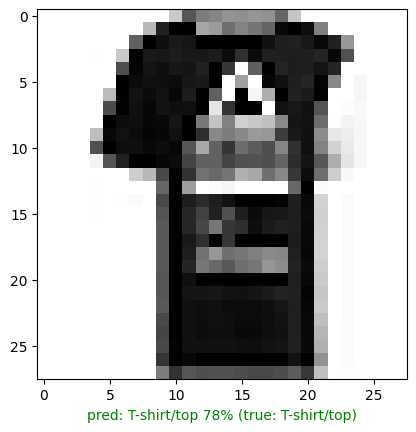

In [110]:
# check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # allways make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## what patterns is our model learning?

In [111]:
# find the layers of our most recent model
model_14.layers

In [112]:
# extract a particular layer
model_14.layers[1]

In [113]:
# get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 7.0817769e-05, -6.7388833e-01, -4.2915128e-02,  3.5350695e-01],
        [ 1.2687944e-02, -3.7544647e-01,  2.3444676e-01, -1.2991647e-01],
        [-3.8943961e-02, -5.6061965e-01, -5.3564709e-01,  4.4859222e-01],
        ...,
        [-1.9532377e-02, -3.7417805e-01,  6.8743950e-01,  9.5496669e-02],
        [-1.1148155e-02, -1.0250944e+00,  4.9116990e-01,  1.2500076e+00],
        [-1.0884382e-02, -3.3509645e-01,  8.7489836e-02,  6.4952308e-01]],
       dtype=float32),
 (784, 4))

In [114]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


now let's check out the bias vector...

In [115]:
# bias and biases shapes
biases, biases.shape

(array([-0.01680942,  1.8883388 ,  2.1998823 ,  0.48741114], dtype=float32),
 (4,))

every neron has a bias vector, each of these is paired with a weights matrix.

the bias vector get initialized as zeros (at leas in the case of a tensorflow dense layer)

the bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [116]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


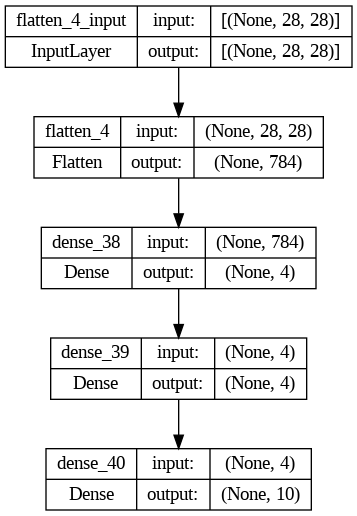

In [117]:
# let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Next: check out exercises and extra curriculum...

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circules
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [6]:
X[0].shape

(2,)

In [7]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# create the model
model_exercise = tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# compile the model
model_exercise.compile(loss=tf.keras.losses.binary_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

In [8]:
model_exercise.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable pa

In [9]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=4)

history_exercise = model_exercise.fit(X_train, y_train, epochs=300, callbacks=[es_callback])

Epoch 1/300
25/25 [==============================] - 1s 3ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4437
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4625
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4938
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5938
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.6263
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6637
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6787
Epoch 9/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6750
Epoch 10/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.7325
Epoch 11/

In [10]:
model_exercise.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000


[0.004955940414220095, 1.0]

In [11]:
from sklearn.datasets import make_moons

X, y = make_moons()

In [13]:
import pandas as pd

pd.DataFrame(X)

,0,1
0,-0.222521,0.974928
1,-0.345365,0.938468
2,1.096023,-0.495379
3,-0.718349,0.695683
4,2.000000,0.500000
...,...,...
95,1.623490,-0.281831
96,1.672301,-0.240278
97,0.238554,-0.148228
98,0.595217,-0.414413


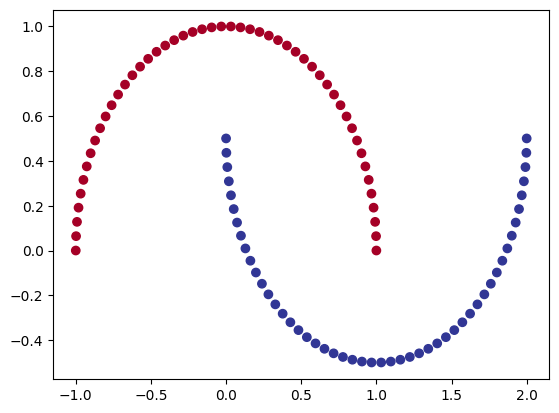

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [18]:
X_train_norm[:10]

array([[0.63615073, 0.00273995],
       [0.32307   , 1.        ],
       [0.16039975, 0.90370506],
       [0.72165091, 0.00820858],
       [0.8596286 , 0.11962459],
       [0.61488568, 0.00820858],
       [0.97830134, 0.41643142],
       [0.89313799, 0.17292394],
       [0.55275137, 0.04070642],
       [0.38717315, 0.99179142]])

In [19]:
X_train_norm[0].shape

(2,)

In [20]:
# set random seed
tf.random.set_seed(42)

# create the model
model_moons = tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# compile the model
model_moons.compile(loss=tf.keras.losses.binary_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])

# early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)

# fit the model
history_moons = model_moons.fit(X_train,
                                y_train,
                                epochs=300,
                                validation_data=(X_test, y_test),
                                callbacks=[es_callback])

Epoch 1/300
3/3 [==============================] - 1s 74ms/step - loss: 0.7854 - accuracy: 0.3625 - val_loss: 0.7507 - val_accuracy: 0.2500
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 0.7793 - accuracy: 0.3125 - val_loss: 0.7463 - val_accuracy: 0.2500
Epoch 3/300
3/3 [==============================] - 0s 14ms/step - loss: 0.7728 - accuracy: 0.2875 - val_loss: 0.7421 - val_accuracy: 0.2500
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 0.7668 - accuracy: 0.2625 - val_loss: 0.7378 - val_accuracy: 0.2500
Epoch 5/300
3/3 [==============================] - 0s 13ms/step - loss: 0.7621 - accuracy: 0.2500 - val_loss: 0.7333 - val_accuracy: 0.2000
Epoch 6/300
3/3 [==============================] - 0s 13ms/step - loss: 0.7553 - accuracy: 0.2250 - val_loss: 0.7291 - val_accuracy: 0.2500
Epoch 7/300
3/3 [==============================] - 0s 13ms/step - loss: 0.7496 - accuracy: 0.2000 - val_loss: 0.7251 - val_accuracy: 0.2500
Epoch 8/300
3/3 [===

In [21]:
model_moons.evaluate(X_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.6364 - accuracy: 0.7000


[0.6363610625267029, 0.699999988079071]

<Axes: xlabel='epochs'>

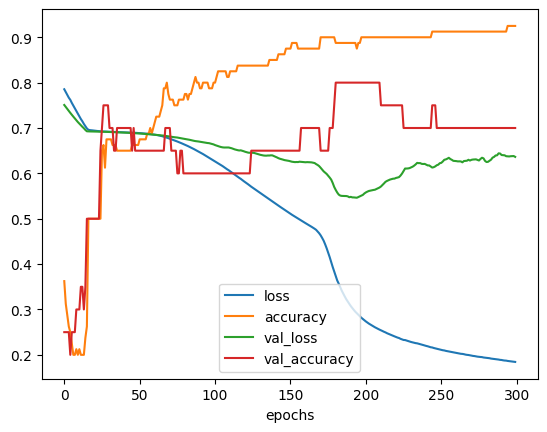

In [22]:
pd.DataFrame(history_moons.history).plot(xlabel="epochs")

In [23]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [24]:
X_train[0].shape, y_train.shape

((28, 28), (60000,))

In [25]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [26]:
# set random seed
tf.random.set_seed(42)

# create the model
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile the model
model_fashion.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=4)

# fit the model
history_fashion = model_fashion.fit(X_train_norm,
                                    y_train,
                                    epochs=50,
                                    validation_data=(X_test_norm, y_test),
                                    callbacks=[es_callback])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5025 - accuracy: 0.8179 - val_loss: 0.4109 - val_accuracy: 0.8502
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3739 - accuracy: 0.8632 - val_loss: 0.4345 - val_accuracy: 0.8457
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3410 - accuracy: 0.8736 - val_loss: 0.3836 - val_accuracy: 0.8609
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3169 - accuracy: 0.8832 - val_loss: 0.3831 - val_accuracy: 0.8618
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3001 - accuracy: 0.8894 - val_loss: 0.3693 - val_accuracy: 0.8668
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2847 - accuracy: 0.8937 - val_loss: 0.3728 - val_accuracy: 0.8575
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2747 - accuracy: 0.8970 - val_loss: 0.3698 - val_accuracy:

In [27]:
model_fashion.evaluate(X_test_norm, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.8869


[0.5475555062294006, 0.886900007724762]

<Axes: >

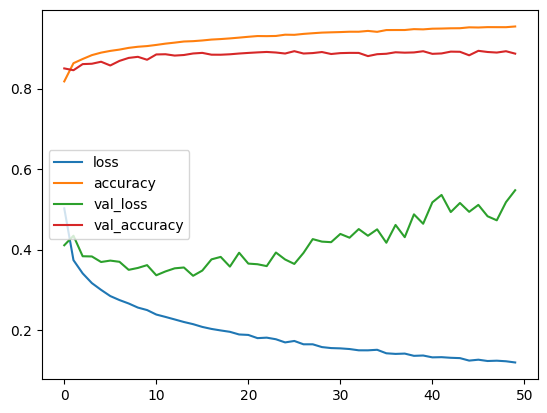

In [28]:
pd.DataFrame(history_fashion.history).plot()

In [29]:
y_probs = model_fashion.predict(X_test_norm)
y_pred = y_probs.argmax(axis=1)
y_pred

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

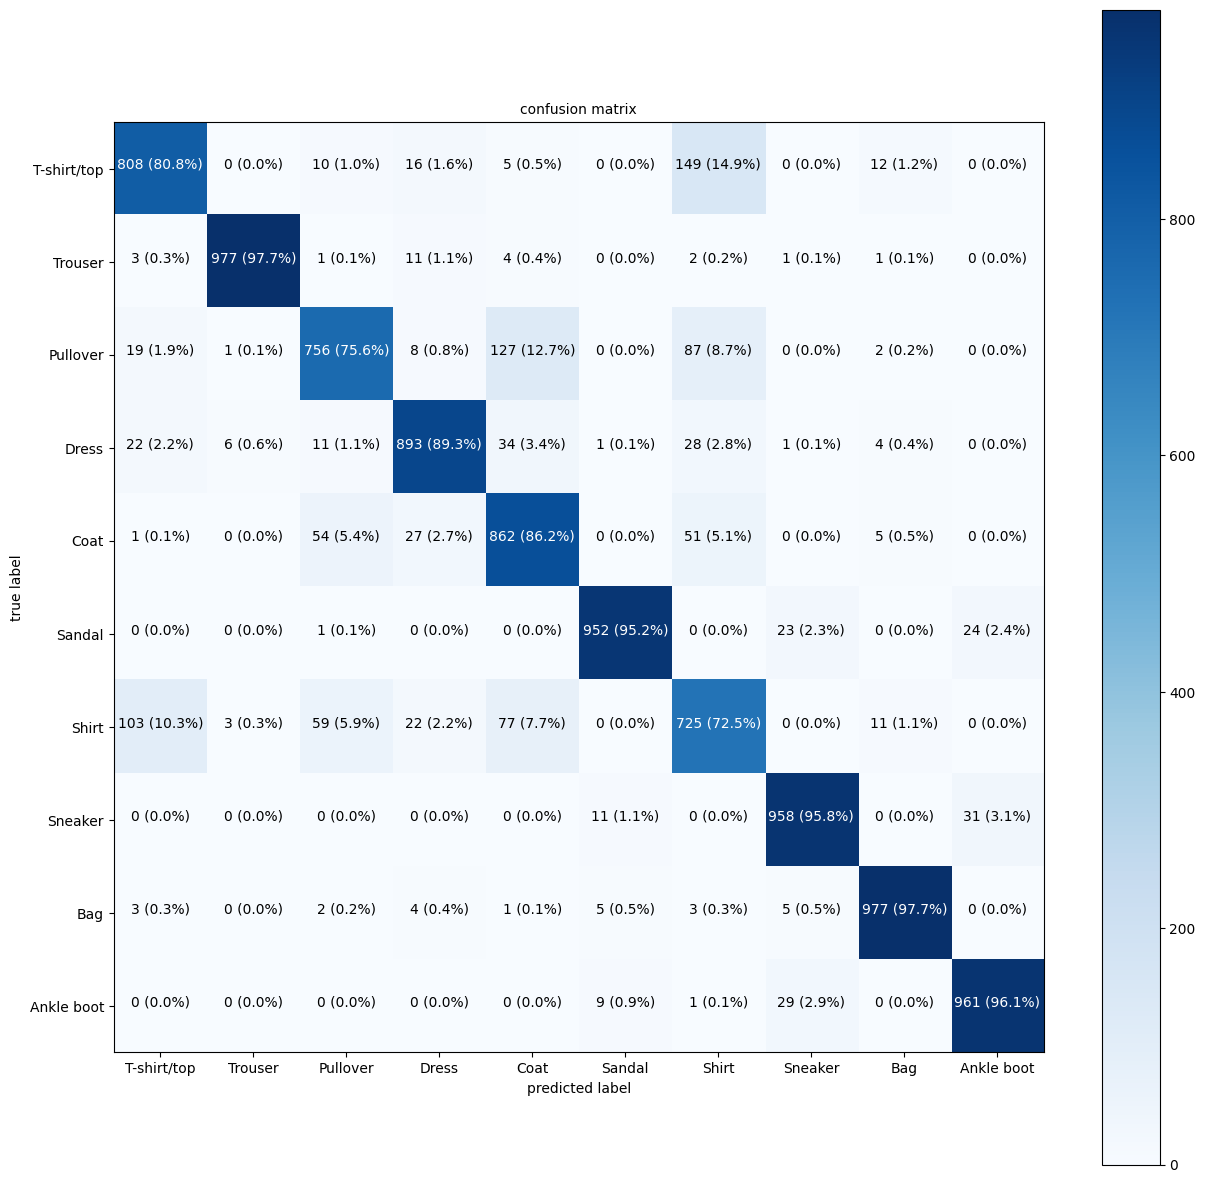

In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

make_confusion_matrix(y_true=y_test,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [38]:
def softmax_function(X):
  return np.exp(X) / np.sum(np.exp(X))

In [39]:
import random
def plot_random_images(model, images, true_labels, classes, num_predictions):
  """
  picks 3 random imageg, plots them and labels them with a prediction and truth label.
  """
  fig, axs = plt.subplots(num_predictions, 1, figsize=(8, 8))
  for num in range(0, num_predictions):
  # set up random integer
    i = random.randint(0, len(images))

    # create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # plot the immage
    axs[num].imshow(target_image, cmap=plt.cm.binary)
    axs[num].axis("off")

    # change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = 'green'
    else:
      color = "red"

    # add xlabel information (prediction/true label)
    axs[num].set_title("pred: {} {:2.0f}% (true: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red based on if prediction is right or wrong
  plt.tight_layout()
  plt.show()

1/1 [==============================] - 0s 21ms/step


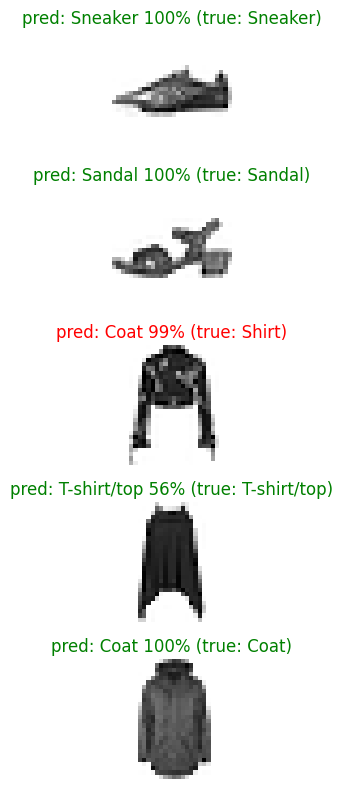

In [40]:
plot_random_images(model=model_fashion,
                   images=X_test_norm,
                   true_labels=y_test,
                   classes=class_names,
                   num_predictions=5)

In [ ]:
X_test_norm

In [44]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [47]:
def plot_images_class(model, images, true_labels, classes, num_predictions, class_prediction):
  """
  picks a given number of images of a given class, plots them and labels them with predictions
  """

  # verify if the inserted class is an existent class
  if class_prediction not in classes:
    return print(f" {class_prediction} is not a valid class, please insert a valid class")
  else:
    class_index = classes.index(class_prediction)

  # select only images belonging to inserted class and their labels
  images_class = images[true_labels == class_index]
  labels_class = true_labels[true_labels == class_index]

  # prepare subplots
  fig, axs = plt.subplots(num_predictions, 1, figsize=(8, 8))

  # select, predict and plot each image
  for num in range(0, num_predictions):
  # set up random integer
    i = random.randint(0, len(images_class))

    # create predictions and targets
    target_image = images_class[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[labels_class[i]]

    # plot the immage
    axs[num].imshow(target_image, cmap=plt.cm.binary)
    axs[num].axis("off")

    # change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = 'green'
    else:
      color = "red"

    # add xlabel information (prediction/true label)
    axs[num].set_title("pred: {} {:2.0f}% (true: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red based on if prediction is right or wrong
  plt.tight_layout()
  plt.show()


1/1 [==============================] - 0s 16ms/step


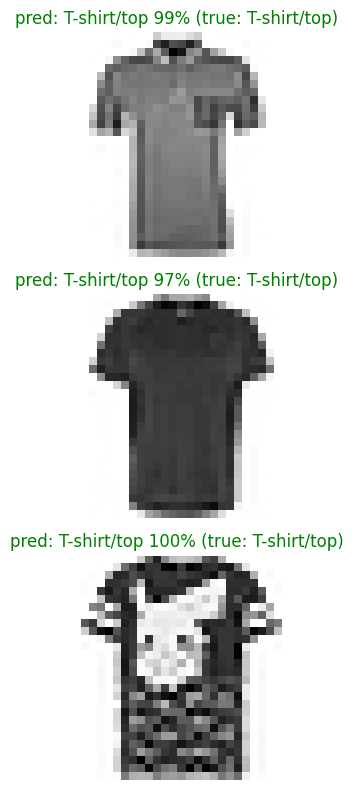

In [52]:
plot_images_class(model=model_fashion,
                  images=X_test_norm,
                  true_labels=y_test,
                  classes=class_names,
                  num_predictions=3,
                  class_prediction="T-shirt/top")